In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
entries = ['DAX','SIE.DE','AAPL','SAP.DE','DRW3.DE','Silver']

In [68]:
merged_quotes = pd.DataFrame()
for e in entries:
    quotes = pd.read_csv('data/'+e+'.csv', sep=';', header=0)
    if merged_quotes.size == 0:
        merged_quotes = quotes
    else:
        merged_quotes = pd.merge(merged_quotes, quotes, on='Date')

In [69]:
merged_quotes.columns=["Date"]+entries
merged_quotes

,Date,DAX,SIE.DE,AAPL,SAP.DE,DRW3.DE,Silver
0,2019-11-25,13246.45,112.43,265.74,123.36,57.60,16.871
1,2019-11-26,13236.42,113.66,263.66,122.40,58.55,17.030
2,2019-11-27,13287.07,113.49,267.21,123.04,56.40,16.912
3,2019-12-02,12964.68,112.21,263.53,119.44,54.80,16.836
4,2019-12-03,12989.29,112.91,258.84,120.16,54.00,17.125
...,...,...,...,...,...,...,...
65,2020-03-06,11541.87,87.16,289.03,107.52,54.30,17.345
66,2020-03-09,10625.02,80.49,266.17,98.94,51.20,16.915
67,2020-03-10,10475.49,79.98,285.34,100.66,50.60,16.985
68,2020-03-11,10438.68,79.71,275.43,100.64,52.10,16.780


In [70]:
pct_changes = merged_quotes.drop('Date',axis=1).pct_change()
pct_changes

,DAX,SIE.DE,AAPL,SAP.DE,DRW3.DE,Silver
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000757,0.010940,-0.007827,-0.007782,0.016493,0.009424
2,0.003827,-0.001496,0.013464,0.005229,-0.036721,-0.006929
3,-0.024263,-0.011279,-0.013772,-0.029259,-0.028369,-0.004494
4,0.001898,0.006238,-0.017797,0.006028,-0.014599,0.017166
...,...,...,...,...,...,...
65,-0.033726,-0.032416,-0.013280,-0.024673,0.010233,-0.008007
66,-0.079437,-0.076526,-0.079092,-0.079799,-0.057090,-0.024791
67,-0.014073,-0.006336,0.072022,0.017384,-0.011719,0.004138
68,-0.003514,-0.003376,-0.034730,-0.000199,0.029644,-0.012069


In [71]:
correlation_matrix = pct_changes.corr()
correlation_matrix

,DAX,SIE.DE,AAPL,SAP.DE,DRW3.DE,Silver
DAX,1.000000,0.944880,0.662793,0.901588,0.195860,0.453078
SIE.DE,0.944880,1.000000,0.596281,0.859334,0.222899,0.430043
AAPL,0.662793,0.596281,1.000000,0.597244,0.198724,0.202810
SAP.DE,0.901588,0.859334,0.597244,1.000000,0.175684,0.435612
DRW3.DE,0.195860,0.222899,0.198724,0.175684,1.000000,-0.202161
Silver,0.453078,0.430043,0.202810,0.435612,-0.202161,1.000000


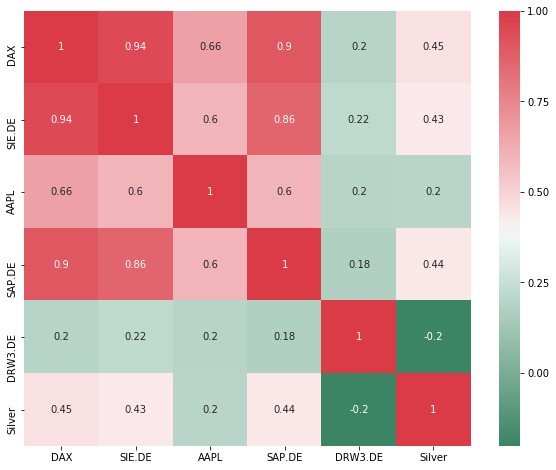

In [81]:
fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(correlation_matrix,
            cmap = cmap,
            annot = True)